####Instalaciones

In [ ]:
#Instalaciones
!pip install textblob
!pip install contractions
!pip install wordcloud
!pip install vaderSentiment
!pip install gensim
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md
import spacy
import es_core_news_sm
import es_core_news_md


     |████████████████████████████████| 16.2 MB 8.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
     |████████████████████████████████| 78.4 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
!python3 -m spacy download en 


     |████████████████████████████████| 12.0 MB 7.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import sys
import re, numpy as np, pandas as pd
from pprint import pprint

In [ ]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df1= pd.read_csv('/content/drive/My Drive/Tickets/Personal.csv')
df1=df1[df1['Grupo']=='Tecnología e Innovación']
df2= pd.read_csv('/content/drive/My Drive/Tickets/Papas.csv')

In [ ]:
# NLTK stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
stop_words.extend(['hola', 'peroo','muchas' ,'gracias', 'aun', 'si', 'saludos', 'monteverde', 'colegio', 'noches', 'buenas', 'ojala', 'tardes', 'buenos', 'dias', 'podrian', 'pueden', 'dia','quisiera', 'saber'
      , 'favor', 'cristina', 'hernandez', 'tecnologia', 'innovacion', 'problema', 'dificultad', 'antemano','correar','necesitar','necesario', 'levantar','cualquier_duda','ro','nbsp','esposo_asi','encuentren_bien',
      'ayudar','ticket','intentar','hacer','decir','esperar','mayar','solo','vez','bien','queria','verlos','basar','tambien','aqui','mandar', 'algun','dar','ahora', 'viernes', 'temer','bonito', 'esten', 'listo', 'siempre'
      'bueno','estan', 'despues', 'gustaria', 'querer', 'poner','llegar','ver','ojo', 'ufeff', 'intentelo'
      'porfa', 'mellar','garcia', 'solorzano' ,'porfa' ,'mellar', 'garcia' ,'solorzano' ,'barrientos' ,'ines', 'erar', 
      'carral', 'grima',  'fatima', 'paloma', 'saldar', 'hermano', 'fwd', 'leigh', 'pf'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
#Paréntesis: Voy a ver cuántos agentes son en total de los dos df
#prueba1=pd.DataFrame(df1.Agente.value_counts(dropna=True, sort=True).rename_axis('unique_values').reset_index(name='counts'))
#prueba2=pd.DataFrame(df2.Agente.value_counts(dropna=True, sort=True).rename_axis('unique_values').reset_index(name='counts'))
#prueba3 = pd.concat([prueba1, prueba2])
#prueba3.unique_values

In [ ]:
df1.shape, df2.shape

((4350, 24), (1977, 18))

In [ ]:
#saco nombres de columnas
cols_df1=df1.columns #colsPersonal
cols_df2=df2.columns #colsPadres

In [ ]:
#Paso a DF los nombres de las columnas
DFcolsPersonal=pd.DataFrame(cols_df1,columns=['Name_Col_Personal'])
DFcolsPadres=pd.DataFrame(cols_df2,columns=['Name_Col_Padres'])


In [ ]:
#DFcolsPersonal

In [ ]:
#DFcolsPadres

In [ ]:
#Tratamiento para dejar df1 igual que df2 (papás)
#Cambiar: 
#Fuente - Origen
#Tiempo de creación : Hora de creación 
#Tiempo de resolución : Hora de resolución
#Última hora de la actualización : Hora de última actualización 

#Eliminar Vencidas hasta ahora, Tiempo de respuesta inicial, Primer tiempo de respuesta (en horas), Tiempo de resolución (en horas), Estado de resolución, Estado de la primera respuesta

df1.drop(['Vencidas hasta ahora', 'Tiempo de respuesta inicial', 'Primer tiempo de respuesta (en horas)', 'Tiempo de resolución (en horas)','Estado de resolución', 'Estado de la primera respuesta'], axis=1, inplace=True)
df1= df1.rename(columns={'Tiempo de creación': 'Hora de creación', 'Tiempo de resolución' : 'Hora de resolución',
'Última hora de la actualización' : 'Hora de última actualización','Fuente':'Origen', 
'Interacciones de agente':'Interacciones del agente', 'Interacciones de cliente':'Interacciones del cliente', 'ID de contacto': 'ID del contacto' })
df1.columns



Index(['ID del ticket', 'Asunto', 'Descripción', 'Estado', 'Prioridad',
       'Origen', 'Tipo', 'Agente', 'Grupo', 'Hora de creación',
       'Hora de resolución', 'Hora de cierre', 'Hora de última actualización',
       'Interacciones del agente', 'Interacciones del cliente', 'Etiquetas',
       'Nombre completo', 'ID del contacto'],
      dtype='object')

In [ ]:
df1['Plataforma']='Personal'
df2['Plataforma']='Padres'

In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.shape

(6327, 19)

In [ ]:
df.tail()

,ID del ticket,Asunto,Descripción,Estado,Prioridad,Origen,Tipo,Agente,Grupo,Hora de creación,Hora de resolución,Hora de cierre,Hora de última actualización,Interacciones del agente,Interacciones del cliente,Etiquetas,Nombre completo,ID del contacto,Plataforma
1972,2004,"pague iPad de paloma ostos y no puse numero de ticket, descuento colegiatura paloma ostos girault","Hola, pague la renta del iPad de paloma Ostos girault, para tercero de primaria, pero no puse el...",Open,Low,Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 11:35:07,NaN,NaN,2021-08-16 15:09:13,2,4,NaN,María de las mercedes girault Facha,giraultmer@gmail.com,Padres
1973,2005,NO esta habilitado mi mail institucional,"Buenas Tardes&nbsp; Al momento de querer dar de alta el mail institucional, aparece que esta inh...",Open,Low,Portal,Correo institucional,Juan José Silva Espinosa,Tecnología e Innovación,2021-08-16 13:55:55,NaN,NaN,2021-08-16 13:55:55,0,1,NaN,Belen,oliveros.bernus@colegiomenteverde.edu.mx,Padres
1974,2006,Re: iPad en renta para Ana Sofía Glez que entrará a 3ero primaria ( pago anexo),"Gracias ! Anexo pago desde mi iPad > El 16 ago 2021, a la(s) 13:30, Colegio Monteverde <support@...",Resolved,Low,Email,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 13:59:04,2021-08-16 14:05:50,NaN,2021-08-16 14:05:50,0,1,NaN,González Alanís,glez.alanis@colegiomonteverde.edu.mx,Padres
1975,2007,Pago de cuota APÁ,"Hola, Teníamos pendiente hacer el pago de la cuota APA, ya lo hicimos por transferencia, hoy me ...",Open,Low,Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 17:00:22,NaN,NaN,2021-08-16 17:00:22,0,1,NaN,Gómez Segura,gomez.segura@colegiomonteverde.edu.mx,Padres
1976,2008,Transporte,Buenas tardes: Vivimos a 1 km de la entrada de Santa Lucía. Hasta abajo de Arteaga y Salazar. Po...,Open,Low,Portal,Otro,Juan José Silva Espinosa,Tecnología e Innovación,2021-08-16 17:33:00,NaN,NaN,2021-08-16 17:33:01,0,1,NaN,Lalieu Hernández,lalieu.hdez@colegiomonteverde.edu.mx,Padres


In [ ]:
df.Grupo.value_counts()

Tecnología e Innovación    4873
Cobranza                   1453
No Group                      1
Name: Grupo, dtype: int64

In [ ]:
#df= df[df['Grupo']=='Tecnología e Innovación']
#df= df[df['Grupo']!=='Cobranza']

In [ ]:
#Veo porcentaje de nulos DF
df_total = df.isnull().sum().sort_values(ascending = False)
df_porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)

df_missing_data = pd.concat([df_total,df_porcentaje], axis = 1, keys = ['Total', 'Percent'])
df_missing_data.head(9) #esto sirve para concatenar dos variables en un df

,Total,Percent
Etiquetas,6314,0.997945
Hora de cierre,1792,0.283231
Hora de resolución,49,0.007745
Tipo,12,0.001897
Descripción,3,0.000474
Plataforma,0,0.000000
Agente,0,0.000000
Asunto,0,0.000000
Estado,0,0.000000


####Qué haré?

Por conocimiento del negocio haré lo siguiente

1. Asunto y Descripción tendrán NLP en un futuro 

2. Eliminare las columnas: 
  - 'Etiquetas' >>tienen un alto porcentaje de nulos, no tiene información relevante 
  - 'Hora de cierre' >> tienen un alto porcentaje de nulos, no tiene información relevante, y es lo mismo que hora de resolición
  - 'Nombre completo'
  - Prioridad
  - Estado >> consideraré todos como resueltos
  - ID del ticket

3. Eliminaré los nulos de 'Hora de resolución', 'Tipo', 'Descripción' porque son muy pocos

4. Eliminaré los registros de No Agent de Agente

5. Pasaré 'Interacciones del agente', 'Interacciones del cliente' a tipo de dato numérico

In [ ]:
#Limpieza
def cleaning(df):

  #Eliminaré las columnas: 'Etiquetas','Hora de cierre','Nombre completo', 'Prioridad', 
  #'Estado','ID del ticket', 'Agente', 'Hora de última actualización'
    df = df.drop(['Etiquetas','Hora de cierre','Nombre completo', 
                  'Prioridad', 'Estado','ID del ticket','ID del contacto',
                  'Hora de última actualización'], axis = 1) #saqué 'Agente',

   #Eliminaré los nulos de 'Hora de resolución', 'Tipo', 'Descripción' porque son muy pocos 
    df = df.dropna(axis=0, subset=['Hora de resolución', 'Tipo', 'Descripción'])
    
    #Eliminaré los registros de No Agent de 'Agente'
    #df= df[df['Agente']!='No Agent']

    return df

In [ ]:
#Transformación de datos
def transformation(df):

#Pasaré a número 'Interacciones del agente', 'Interacciones del cliente'
    df [['Interacciones del agente', 
         'Interacciones del cliente']] = df [['Interacciones del agente', 
                                              'Interacciones del cliente']].apply(pd.to_numeric)
#Cambio a formato fecha las columnas 'Hora de resolución','Hora de creación'
    df[['Hora de resolución','Hora de creación']] =df[['Hora de resolución',
                                                       'Hora de creación']].apply(pd.to_datetime, 
                                                        format = '%Y-%m-%d %H:%M:%S')

    return df

In [ ]:
#aplico funciones cleaning, transformation, dummies a df  
df = cleaning(df)
df= transformation(df)
#df_c = dummies(df_c)

In [ ]:
#Calculo días de respueta y agrego columnas 'HorasRespuesta'y 'DiasRespuesta'
df['HorasRespuesta']=(df['Hora de resolución']  - df['Hora de creación'])
df['DiasRespuesta']=df['HorasRespuesta'].dt.days

In [ ]:
#elimino lo que diga SG porque se cuelan algunos de Servicios generales
df=df[df.Tipo.str.contains("(SG)") == False]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df.shape

(6253, 13)

In [ ]:
#paso a un DF los nombres del nuevo df mix
#dfcolsmix=pd.DataFrame(df.columns, columns=['Namecols_Padres_Personal'])
#dfcolsmix

In [ ]:
df.Tipo.value_counts()

Otros (Tecnología)                            1200
(TI) CPU/ Monitor/ Impresora/Proyector         958
(TI) Programas/Plataformas                     593
(TI) Google                                    330
(TI) Internet                                  327
Aclaración de pagos                            325
Otro                                           297
Referencias de pago                            296
Facturación                                    279
Correo institucional                           252
(TI) Telefonía                                 208
Adeudos                                        192
(TI) Otros                                     178
Solicitud de Cartas                            111
(TI) Montaje de equipo                         106
(TI) Respaldo                                   98
(TI) Schoolnet-Colegium                         88
Domiciliación Pagos                             65
Schoolnet Colegium                              57
Wifi - Internet                

In [ ]:
df.columns

Index(['Asunto', 'Descripción', 'Origen', 'Tipo', 'Agente', 'Grupo',
       'Hora de creación', 'Hora de resolución', 'Interacciones del agente',
       'Interacciones del cliente', 'Plataforma', 'HorasRespuesta',
       'DiasRespuesta'],
      dtype='object')

In [ ]:
df.Agente.value_counts()

Juan José Silva Espinosa                3218
María Cristina Hernández Márquez         731
Laura Galván Ayala                       692
Mariana Mora González                    582
No Agent                                 490
Daniela Virgen Cuevas                    280
Mónica Martínez Acebes                    99
María Fernanda Cortés Martínez            62
Paloma Llovet Abascal                     43
Ricardo Macias                            43
Adela Araceli Velazquez Trejo             12
Isabel Castro Fernández del Castillo       1
Name: Agente, dtype: int64

In [ ]:
#Elimino estos porque son registros con menos de 8 ** dejaré el de Odoo porque me parece importante
df= df[df['Tipo']!='Schooltalk']
df= df[df['Tipo']!='Apoyo con Software']
df= df[df['Tipo']!='Problema Hardware']
df= df[df['Tipo']!='Problema Software']
df= df[df['Tipo']!='Impresión a color']
df= df[df['Tipo']!='Solicitud de Equipo']
df= df[df['Tipo']!='Gestión y mantenimiento de Servidores']
df= df[df['Tipo']!='Cámaras de Seguridad']

In [ ]:
df.shape

(6228, 13)

In [ ]:
len(df.groupby('Tipo')[['DiasRespuesta']].mean().sort_values('DiasRespuesta', ascending=False).reset_index())

29

In [ ]:
tipo_diasrespuesta=df.groupby('Tipo')[['DiasRespuesta']].mean().sort_values('DiasRespuesta', ascending=False).reset_index()

In [ ]:
x= tipo_diasrespuesta['Tipo']
y= tipo_diasrespuesta['DiasRespuesta']

In [ ]:
#elimino lo que diga SG
prueba=df[df.Tipo.str.contains("(SG)") == False]
prueba=prueba.groupby('Tipo')[['DiasRespuesta']].mean().sort_values('DiasRespuesta', ascending=False).reset_index()
prueba

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Tipo,DiasRespuesta
0,Material tecnológico,26.366667
1,(TI) iPad/Macbook,9.972222
2,Sites,8.333333
3,Meet,7.760000
4,Facturación,4.946237
5,Otro,4.905724
6,Aclaración de pagos,4.609231
7,Domiciliación Pagos,4.230769
8,(TI) iPad/Computadora/Impresora,4.086957
9,Adeudos,4.036458


In [ ]:
#Aunque es muy poco el porcentaje de otros veré que puedo sacar
#creo un df sólo con la info de otros. 
#df= df1[df1['Tipo']=='Otro']
len(df)

6228

In [ ]:
df.columns

Index(['Asunto', 'Descripción', 'Origen', 'Tipo', 'Agente', 'Grupo',
       'Hora de creación', 'Hora de resolución', 'Interacciones del agente',
       'Interacciones del cliente', 'Plataforma', 'HorasRespuesta',
       'DiasRespuesta'],
      dtype='object')

In [ ]:
df.head(1)

,Asunto,Descripción,Origen,Tipo,Agente,Grupo,Hora de creación,Hora de resolución,Interacciones del agente,Interacciones del cliente,Plataforma,HorasRespuesta,DiasRespuesta
3,Instalar complemento de Software,Enseñar a Cristina cómo hacerlo cuando lo hagas.,Phone,Otros (Tecnología),Juan José Silva Espinosa,Tecnología e Innovación,2017-06-20 17:43:03,2018-02-06 14:48:38,0,1,Personal,230 days 21:05:35,230


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # para quitar mails
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [ ]:
# Conversión a lista
data = df['Asunto'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words)

[['instalar', 'complemento', 'de', 'software'], ['configurar', 'vpn'], ['mantenimiento', 'computadora'], ['checar', 'impresora', 'de', 'aracelli'], ['falla', 'de', 'internet'], ['capacitacion', 'commtrack', 'plantilla'], ['conectar', 'computadora', 'de', 'laura'], ['conectar', 'impresora', 'en', 'direccion'], ['computadora', 'de', 'biblioteca', 'imprime', 'en', 'primaria'], ['acceso', 'denegado', 'en', 'innovat'], ['canon'], ['omar'], ['servidor', 'colegio'], ['no', 'llegan', 'los', 'correos', 'no', 'tengo', 'internet'], ['intalar', 'colegium'], ['monitor', 'esperanza', 'de', 'la', 'garza'], ['computadora', 'lenta', 'internet', 'lento'], ['cambio', 'de', 'direccion', 'de', 'canones', 'primaria'], ['cambio', 'computadoras', 'creacion', 'de', 'usuarios'], ['impresora', 'no', 'imprime'], ['inpresora', 'escuela', 'de', 'padres'], ['configuracion', 'de', 'laptop', 'para', 'impresion'], ['formateo', 'limpiza', 'de', 'computadora', 'de', 'prestamo', 'de', 'preparatoria'], ['computadora', 'de'

In [ ]:
# Construcción de bigramas y trigramas
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    #Quito Stopwords,bigramas,trigramas y aplico lematization
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = es_core_news_sm.load() #este es para español
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
df

,Asunto,Descripción,Origen,Tipo,Agente,Grupo,Hora de creación,Hora de resolución,Interacciones del agente,Interacciones del cliente,Plataforma,HorasRespuesta,DiasRespuesta
3,Instalar complemento de Software,Enseñar a Cristina cómo hacerlo cuando lo hagas.,Phone,Otros (Tecnología),Juan José Silva Espinosa,Tecnología e Innovación,2017-06-20 17:43:03,2018-02-06 14:48:38,0,1,Personal,230 days 21:05:35,230
27,Configurar VPN,Configurar VPN para poder acceder al servidor de Colegium desde una red externa. Instalársela a ...,Phone,(TI) Internet,Juan José Silva Espinosa,Tecnología e Innovación,2017-06-29 09:11:23,2017-07-20 09:59:19,0,1,Personal,21 days 00:47:56,21
33,Mantenimiento computadora,Pasar por la computadora de Patricia para darle mantenimiento como habías acordado con ella. Hay...,Phone,(TI) CPU/ Monitor/ Impresora/Proyector,Juan José Silva Espinosa,Tecnología e Innovación,2017-07-07 13:21:40,2017-08-08 10:26:59,0,1,Personal,31 days 21:05:19,31
37,Checar Impresora de Aracelli,La impresora hace ruidos y sale basurita. Parece que una goma se deshizo. La oficina de Araceli ...,Phone,(TI) CPU/ Monitor/ Impresora/Proyector,Juan José Silva Espinosa,Tecnología e Innovación,2017-07-11 12:00:06,2017-07-14 13:55:28,0,1,Personal,3 days 01:55:22,3
39,Falla de internet.,El internet de la zona de DAS y el ingeniero está intermitente.,Phone,(TI) Internet,Juan José Silva Espinosa,Tecnología e Innovación,2017-07-14 13:06:55,2017-07-18 11:28:18,0,1,Personal,3 days 22:21:23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,Detalle saldos pendientes,Aclaración y detalle de saldos pendientes,Phone,Adeudos,Laura Galván Ayala,Cobranza,2021-08-12 12:36:58,2021-08-12 14:08:57,1,1,Padres,0 days 01:31:59,0
1957,error en el pago,"estimados, he realizado el pago de estas dos facturas. FCC20217767 16/06/2021 10/06/2021 Junio R...",Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-12 16:40:32,2021-08-13 10:38:58,0,1,Padres,0 days 17:58:26,0
1964,No llego correo de la junta del 16,"Buenas noches, estoy buscando el correo para la junta de primero de primaria y no lo tengo para ...",Email,Otro,Mariana Mora González,Cobranza,2021-08-15 23:28:40,2021-08-16 08:44:13,0,1,Padres,0 days 09:15:33,0
1971,aclaración pago pendiente,"Hola, acabo de pagar la factura&nbsp;FCC20212159 por&nbsp;$&nbsp;30,965.80.&nbsp;La factura no a...",Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 10:22:46,2021-08-16 13:36:55,1,1,Padres,0 days 03:14:09,0


In [ ]:
# Diccionario
id2word = corpora.Dictionary(data_ready)
type(id2word)

gensim.corpora.dictionary.Dictionary

In [ ]:
# Frecuencia
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

In [ ]:
# modelo LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=50,
                                           update_every=1,
                                           chunksize=10,
                                           passes=7,
                                           alpha='symmetric',
                                           iterations=50,
                                           per_word_topics=True)

lda_model.print_topics()

[(0,
  '0.098*"caja" + 0.083*"tecnologica" + 0.047*"intituicionales" + 0.036*"cargo" + 0.032*"bueno" + 0.032*"conducta" + 0.031*"duplicar" + 0.030*"drive" + 0.028*"seguimiento" + 0.027*"northridge"'),
 (1,
  '0.167*"entrar" + 0.164*"solicitud" + 0.148*"cobranza" + 0.051*"tecnologico" + 0.049*"material" + 0.034*"preescolar" + 0.025*"tiempo" + 0.020*"cuartar" + 0.018*"gradar" + 0.017*"sistema"'),
 (2,
  '0.088*"hijo" + 0.075*"reinscripciones" + 0.056*"cuaderno" + 0.040*"probar" + 0.034*"escolar" + 0.034*"ipad" + 0.030*"enviar" + 0.028*"odoo" + 0.027*"corresponder" + 0.027*"respuesta"'),
 (3,
  '0.162*"plataforma" + 0.115*"digital" + 0.077*"becar" + 0.040*"paular" + 0.031*"documentar" + 0.028*"certificación" + 0.027*"hoy" + 0.026*"nuevo" + 0.022*"lnstitucional" + 0.021*"evidenciar"'),
 (4,
  '0.380*"pagar" + 0.130*"pago" + 0.066*"cuota" + 0.053*"comprobante" + 0.049*"adeudo" + 0.047*"rentar" + 0.022*"referenciar" + 0.021*"acceso" + 0.015*"recordatorio" + 0.015*"utiles"'),
 (5,
  '0.337*"f

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Main topic
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # DF original con los topics
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Registro', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
df.shape

(6228, 13)

In [ ]:
df_dominant_topic.shape

(6228, 5)

In [ ]:
df_dominant_topic.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
#df=0
df = pd.concat( [df_dominant_topic,df], axis=1) 

In [ ]:
df.tail()

,Registro,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Asunto,Descripción,Origen,Tipo,Agente,Grupo,Hora de creación,Hora de resolución,Interacciones del agente,Interacciones del cliente,Plataforma,HorasRespuesta,DiasRespuesta
6223,6223,5.0,0.5250,"facturar, pendiente, normativo, firmar, detallar, recargo, preguntar, fiscal, febrero, equivocar","[detallar, saldo, pendiente]",Detalle saldos pendientes,Aclaración y detalle de saldos pendientes,Phone,Adeudos,Laura Galván Ayala,Cobranza,2021-08-12 12:36:58,2021-08-12 14:08:57,1,1,Padres,0 days 01:31:59,0
6224,6224,4.0,0.5500,"pagar, pago, cuota, comprobante, adeudo, rentar, referenciar, acceso, recordatorio, utiles",[pagar],error en el pago,"estimados, he realizado el pago de estas dos facturas. FCC20217767 16/06/2021 10/06/2021 Junio R...",Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-12 16:40:32,2021-08-13 10:38:58,0,1,Padres,0 days 17:58:26,0
6225,6225,0.0,0.1000,"caja, tecnologica, intituicionales, cargo, bueno, conducta, duplicar, drive, seguimiento, northr...",[],No llego correo de la junta del 16,"Buenas noches, estoy buscando el correo para la junta de primero de primaria y no lo tengo para ...",Email,Otro,Mariana Mora González,Cobranza,2021-08-15 23:28:40,2021-08-16 08:44:13,0,1,Padres,0 days 09:15:33,0
6226,6226,4.0,0.3667,"pagar, pago, cuota, comprobante, adeudo, rentar, referenciar, acceso, recordatorio, utiles","[pagar, pendiente]",aclaración pago pendiente,"Hola, acabo de pagar la factura&nbsp;FCC20212159 por&nbsp;$&nbsp;30,965.80.&nbsp;La factura no a...",Portal,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 10:22:46,2021-08-16 13:36:55,1,1,Padres,0 days 03:14:09,0
6227,6227,4.0,0.3500,"pagar, pago, cuota, comprobante, adeudo, rentar, referenciar, acceso, recordatorio, utiles","[rentar, entrar, primario, pagar, anexar]",Re: iPad en renta para Ana Sofía Glez que entrará a 3ero primaria ( pago anexo),"Gracias ! Anexo pago desde mi iPad > El 16 ago 2021, a la(s) 13:30, Colegio Monteverde <support@...",Email,Aclaración de pagos,Mariana Mora González,Cobranza,2021-08-16 13:59:04,2021-08-16 14:05:50,0,1,Padres,0 days 00:06:46,0


In [ ]:
count_topic=pd.DataFrame(df.Dominant_Topic.value_counts(), columns=['prueba'])
count_topic

#DFcolsPersonal=pd.DataFrame(cols_df1,columns=['Name_Col_Personal'])
#(pd.DataFrame(df_series, columns=['A']))

,prueba


In [ ]:
prueba= df[['Dominant_Topic', 'Keywords', 'Asunto', 'Text', 'Tipo', 'Plataforma',	'HorasRespuesta']]

In [ ]:
prueba.value_counts()

Dominant_Topic  Keywords                                                                                              Asunto                                                                                                                          
8.0             familiar, primario, recibir, ipads, anexar, dato, ingresar, numeroso, indicar, doblar                 Bienvenida CMV. Activación de correo familiar                                                                                       50
0.0             caja, tecnologica, intituicionales, cargo, bueno, conducta, duplicar, drive, seguimiento, northridge  Internet                                                                                                                            40
                                                                                                                      Bienvenida CMV. Activación de Correo                                                                                             

In [ ]:
prueba.Dominant_Topic.value_counts()

0.0    2340
6.0     846
4.0     480
2.0     479
7.0     449
8.0     429
5.0     358
9.0     315
3.0     282
1.0     250
Name: Dominant_Topic, dtype: int64

In [ ]:
dfuno= prueba[prueba['Dominant_Topic']==1]
dfdos= prueba[prueba['Dominant_Topic']==2]
dftres= prueba[prueba['Dominant_Topic']==3]

In [ ]:
dfdos.Plataforma.value_counts()

Personal    399
Padres       80
Name: Plataforma, dtype: int64

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9000,"caja, tecnologica, intituicionales, cargo, bueno, conducta, duplicar, drive, seguimiento, northr...","[acomodar, cable, ex, patronato, velcro, facil, dejarlos, ordenar]"
1,1.0,0.8200,"entrar, solicitud, cobranza, tecnologico, material, preescolar, tiempo, cuartar, gradar, sistema","[junto, citar, entrevistar, participante]"
2,2.0,0.8714,"hijo, reinscripciones, cuaderno, probar, escolar, ipad, enviar, odoo, corresponder, respuesta","[biblioteca, abrir, archivar, tipo, archivar, diferente]"
3,3.0,0.8714,"plataforma, digital, becar, paular, documentar, certificación, hoy, nuevo, lnstitucional, eviden...","[asesoria, cursar, sam, hoy, noche, hrs]"
4,4.0,0.8500,"pagar, pago, cuota, comprobante, adeudo, rentar, referenciar, acceso, recordatorio, utiles","[rentar, instrumentar, pagar, pagar, libro]"
5,5.0,0.8200,"facturar, pendiente, normativo, firmar, detallar, recargo, preguntar, fiscal, febrero, equivocar","[clavar, telefono, bloquear, restablecer]"
6,6.0,0.8500,"dudar, cambiar, recargar, aparecer, octubre, julio, septiembre, volver, reconocer, certificación","[editar, cambiar, horario, apartar, auditorio]"
7,7.0,0.8200,"colegiatura, contar, inscripción, descontar, mes, enero, fecho, boleta, devolver, pasar","[clickypaga, rechazar, pasar, colegiatura]"
8,8.0,0.8500,"familiar, primario, recibir, ipads, anexar, dato, ingresar, numeroso, indicar, doblar","[nombrar, recibir, chat, notificación, conferenciar]"
9,9.0,0.8200,"alumno, institucional, deuda, contrasena, paquete, cuenta, saldo, olvidar, abril, semana","[reiniciar, contrasena, electronico, rios]"


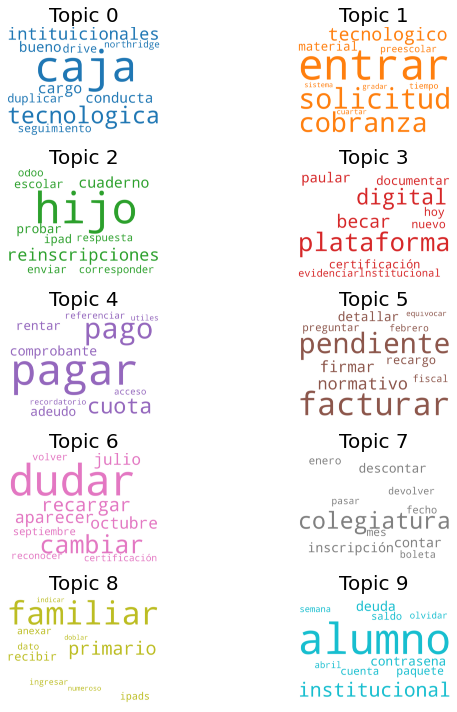

In [ ]:
#Wordcloud de top words 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=700)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()